### Sample of Discriminant Model

In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris

from main import PerformanceEval
from src.model.discriminant import RDA

In [2]:
iris = load_iris()
df = pd.DataFrame(np.concatenate((iris["target"].reshape(150, 1), iris["data"]), axis=1))
df.head()

,0,1,2,3,4
0,0.0,5.1,3.5,1.4,0.2
1,0.0,4.9,3.0,1.4,0.2
2,0.0,4.7,3.2,1.3,0.2
3,0.0,4.6,3.1,1.5,0.2
4,0.0,5.0,3.6,1.4,0.2


In [3]:
params_set = {"alpha": [0,1], "beta": [0,1], "step": 0.1}

pf_eval = PerformanceEval("train", RDA())
pf_eval.train(df, params_set, 3)

pf_eval.evaluate(df)

100%|██████████| 10/10 [00:06<00:00,  1.55it/s]

Optimal hyper-parameter
alpha : 0.3000, beta : 0.0000, F1 score : 0.9723
##################################################
Prediction score for test data
Accuracy: 1.0000 / Precision: 1.0000 / Recall: 1.0000 / F1 score : 1.0000
##################################################
Parameters are saved. File name is 'rda-params.pkl'.
##################################################
Prediction score for unseen data
Accuracy: 0.9800 / Precision: 0.9811 / Recall: 0.9800 / F1 score : 0.9800


,0,1,2
0,50,0,0
1,0,47,3
2,0,0,50


### Sample of clustering model

In [4]:
from main import show_results
from src.model.clustering import GaussianMixture

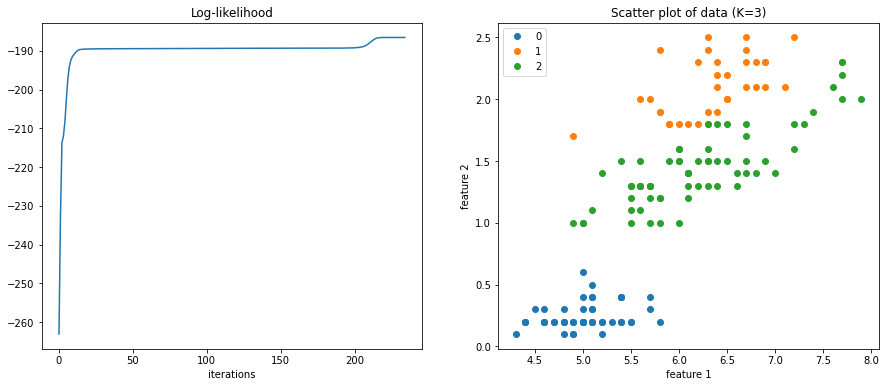

In [10]:
GM = GaussianMixture(3)
log_loglikelihood = GM.fit(iris["data"])
predictions = np.apply_along_axis(GM.predict, 1, iris["data"])
show_results(iris["data"], log_loglikelihood, 3, predictions, [0, 3])